## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os

In [5]:
L1=os.listdir()[8:-2]
L1

['DST-US06-FUDS-0',
 'DST-US06-FUDS-10',
 'DST-US06-FUDS-20',
 'DST-US06-FUDS-25',
 'DST-US06-FUDS-30',
 'DST-US06-FUDS-40',
 'DST-US06-FUDS-50',
 'DST-US06-FUDS-N10']

In [7]:
os.listdir('DST-US06-FUDS-0/')

['A1-007-DST-US06-FUDS-0-20120813.xlsx',
 'A1-008-DST-US06-FUDS-0-20120813.xlsx',
 '~$A1-007-DST-US06-FUDS-0-20120813.xlsx']

In [9]:
dataframes=[]
temperatures=[0,10,20,25,30,40,50,-10]
for i in range(8):
    temp=os.listdir(L1[i])
    path1=L1[i]+'/'+temp[0]
    path2=L1[i]+'/'+temp[1]
    df1=pd.read_excel(path1,sheet_name='Channel_1-006')
    df2=pd.read_excel(path2,sheet_name='Channel_1-005')
    df3=pd.concat([df1, df2], ignore_index=True)
    df3['temperature']=temperatures[i]
    dataframes.append(df3)
    print(temperatures[i], 'completed')

0 completed
10 completed
20 completed
25 completed
30 completed
40 completed
50 completed
-10 completed


In [10]:
df=pd.concat([dataframes[0],dataframes[1],dataframes[2],dataframes[3],dataframes[4],dataframes[5],dataframes[6],dataframes[7]], ignore_index=True)

In [11]:
df.columns

Index(['Data_Point', 'Test_Time(s)', 'Date_Time', 'Step_Time(s)', 'Step_Index',
       'Cycle_Index', 'Current(A)', 'Voltage(V)', 'Charge_Capacity(Ah)',
       'Discharge_Capacity(Ah)', 'Charge_Energy(Wh)', 'Discharge_Energy(Wh)',
       'dV/dt(V/s)', 'Internal_Resistance(Ohm)', 'Is_FC_Data',
       'AC_Impedance(Ohm)', 'ACI_Phase_Angle(Deg)', 'Temperature (C)_1',
       'temperature'],
      dtype='object')

In [12]:
X=df[['Test_Time(s)','Internal_Resistance(Ohm)','Current(A)','Voltage(V)','dV/dt(V/s)','temperature']]
y=df[['Charge_Capacity(Ah)','Discharge_Capacity(Ah)']]

In [ ]:
sns.pairplot(X)

In [25]:
df.describe()

,Data_Point,Test_Time(s),Step_Time(s),Step_Index,Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),dV/dt(V/s),Internal_Resistance(Ohm),Is_FC_Data,AC_Impedance(Ohm),ACI_Phase_Angle(Deg),Temperature (C)_1
count,25342.000000,25342.000000,2.534200e+04,25342.000000,25342.0,25342.000000,25342.000000,25342.000000,25342.000000,25342.000000,25342.000000,25342.000000,25342.000000,25342.0,25342.0,25342.0,25342.000000
mean,12671.500000,19792.018992,4.487835e+02,15.637361,1.0,-0.365870,3.194413,2.377684,1.835368,8.428493,5.377812,-0.000077,0.136752,0.0,0.0,0.0,51.895414
std,7315.749597,10344.669421,4.253477e+02,6.714514,0.0,0.942702,0.248860,1.051746,1.108242,3.729495,3.239910,0.029755,0.031450,0.0,0.0,0.0,0.285724
min,1.000000,3.009580,7.699193e-07,1.000000,1.0,-3.849713,1.977272,0.000000,0.000000,0.000000,0.000000,-0.166196,0.000000,0.0,0.0,0.0,50.507507
25%,6336.250000,9923.293318,1.515496e+02,8.000000,1.0,-0.877096,3.073859,1.231080,0.915550,4.368803,2.697681,-0.004924,0.123292,0.0,0.0,0.0,51.705555
50%,12671.500000,19995.797442,3.091437e+02,16.000000,1.0,-0.307042,3.217280,2.429880,1.819995,8.613559,5.335398,0.000000,0.143840,0.0,0.0,0.0,51.855881
75%,19006.750000,29986.687353,5.823269e+02,24.000000,1.0,0.038933,3.333310,3.599178,2.730624,12.763992,8.010834,0.001170,0.149234,0.0,0.0,0.0,52.065273
max,25342.000000,36639.617045,2.620980e+03,27.000000,1.0,2.061054,3.868523,3.803227,3.814257,13.472291,11.103696,0.183801,0.218859,0.0,0.0,0.0,52.810326


## Training and Testing Data

Let's set X which consists of numerical features of the battery
whereas target variable y consists of charge and discharge capacities

Let's split the data into training and testing sets.


** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,BatchNormalization
from tensorflow.keras.optimizers import Adam


In [15]:
model = Sequential()
model.add(BatchNormalization())
model.add(Dense(30,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(20,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10,activation='relu'))
model.add(Dense(2))

model.compile(optimizer='adam',loss='mse')

In [16]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=50)

Epoch 1/50
2058/2058 [==============================] - 5s 2ms/step - loss: 0.1444 - val_loss: 0.0129
Epoch 2/50
2058/2058 [==============================] - 4s 2ms/step - loss: 0.0238 - val_loss: 0.0076
Epoch 3/50
2058/2058 [==============================] - 4s 2ms/step - loss: 0.0169 - val_loss: 0.0082
Epoch 4/50
2058/2058 [==============================] - 4s 2ms/step - loss: 0.0139 - val_loss: 0.0048
Epoch 5/50
2058/2058 [==============================] - 4s 2ms/step - loss: 0.0115 - val_loss: 0.0048
Epoch 6/50
2058/2058 [==============================] - 4s 2ms/step - loss: 0.0102 - val_loss: 0.0036
Epoch 7/50
2058/2058 [==============================] - 4s 2ms/step - loss: 0.0091 - val_loss: 0.0030
Epoch 8/50
2058/2058 [==============================] - 4s 2ms/step - loss: 0.0078 - val_loss: 0.0035
Epoch 9/50
2058/2058 [==============================] - 4s 2ms/step - loss: 0.0070 - val_loss: 0.0026
Epoch 10/50
2058/2058 [==============================] - 4s 2ms/step - loss: 0.006

In [17]:
losses = pd.DataFrame(model.history.history)

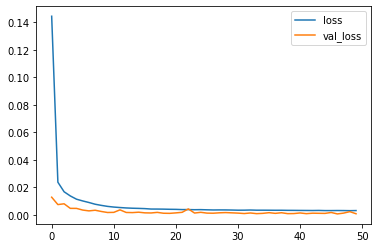

In [18]:
losses.plot()

In [94]:
model.weights

[<tf.Variable 'dense_18/kernel:0' shape=(4, 30) dtype=float32, numpy=
 array([[ 6.78614855e-01,  5.34919262e-01, -7.53346562e-01,
         -6.36899769e-02,  5.74770212e-01,  5.27289391e-01,
          6.73822284e-01, -1.10691041e-01,  2.23158538e-01,
         -7.38653123e-01,  3.11299205e-01, -5.84935188e-01,
          1.51649213e+00, -1.39571190e-01, -8.21066201e-01,
          2.82743126e-02,  8.19608476e-03, -3.79426867e-01,
          2.84301788e-01, -5.71692526e-01, -8.41419578e-01,
         -1.64740026e-01, -3.57122600e-01, -9.01016116e-01,
          1.43466577e-01,  2.97464937e-01,  6.76185071e-01,
          2.67863870e-02, -1.28087771e+00, -3.19483906e-01],
        [-2.88561285e-01, -4.45007205e-01, -1.80469304e-01,
         -1.22516714e-01,  3.15326214e-01, -7.28549436e-02,
          2.43559867e-01, -1.36825085e-01, -8.99084657e-02,
          4.90752384e-02, -1.48352325e-01, -2.88323194e-01,
         -1.46075010e-01, -4.00160253e-01, -5.15432730e-02,
          2.00510293e-01,  2.

In [19]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [20]:
predictions = model.predict(X_test)

In [21]:
charge_pred=[predictions[i][0] for i in range(len(predictions))]
discharge_pred=[predictions[i][1] for i in range(len(predictions))]

In [22]:
mean_absolute_error(y_test,predictions)

0.02239043564981582

In [23]:
y_test['Charge_Capacity(Ah)']

55076     2.057990
259282    2.431764
248747    1.188228
8237      1.580097
131379    2.334986
            ...   
365319    0.908212
144423    1.003903
219159    1.070417
49507     1.057140
309460    2.450625
Name: Charge_Capacity(Ah), Length: 112869, dtype: float64

In [24]:
len(charge_pred)

112869

In [25]:
mean_absolute_error(y_test['Charge_Capacity(Ah)'],charge_pred)

0.021577841276309885

In [26]:
y_test['Charge_Capacity(Ah)'].mean()

2.2133261735377516

In [27]:
mean_absolute_error(y_test['Discharge_Capacity(Ah)'],discharge_pred)

0.02320303002332188

In [28]:
y_test['Discharge_Capacity(Ah)'].mean()

1.690059705851323

In [29]:
predictions

array([[2.001506  , 1.2067491 ],
       [2.4455886 , 2.4229558 ],
       [1.1762943 , 0.7968415 ],
       ...,
       [1.0622382 , 0.08889797],
       [1.0404198 , 0.359266  ],
       [2.4751332 , 2.478191  ]], dtype=float32)

Text(0, 0.5, 'predicted')

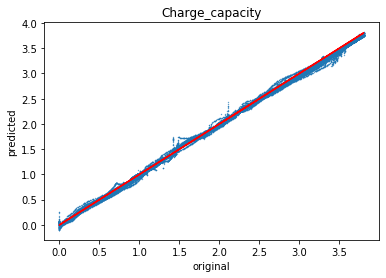

In [30]:
plt.scatter(y_test['Charge_Capacity(Ah)'],[predictions[i][0] for i in range(len(predictions))],s=0.1)
plt.plot(y_test['Charge_Capacity(Ah)'],y_test['Charge_Capacity(Ah)'],'r')
plt.title('Charge_capacity')
plt.xlabel('original')
plt.ylabel('predicted')

Text(0, 0.5, 'predicted')

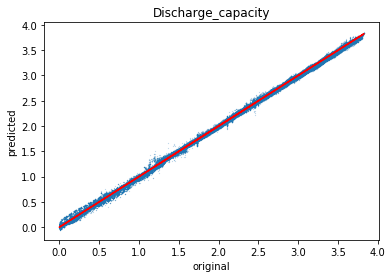

In [31]:
plt.scatter(y_test['Discharge_Capacity(Ah)'],[predictions[i][1] for i in range(len(predictions))],s=0.01)
plt.plot(y_test['Discharge_Capacity(Ah)'],y_test['Discharge_Capacity(Ah)'],'r')
plt.title('Discharge_capacity')
plt.xlabel('original')
plt.ylabel('predicted')

In [32]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.02239043564981582
MSE: 0.0009162049800562483
RMSE: 0.03026887807726359


In [33]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test['Charge_Capacity(Ah)'],charge_pred ))
print('MSE:', metrics.mean_squared_error(y_test['Charge_Capacity(Ah)'],charge_pred ))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test['Charge_Capacity(Ah)'],charge_pred )))

MAE: 0.021577841276309885
MSE: 0.0008597224259490625
RMSE: 0.029321023617006663


In [34]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test['Discharge_Capacity(Ah)'],discharge_pred ))
print('MSE:', metrics.mean_squared_error(y_test['Discharge_Capacity(Ah)'],discharge_pred ))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test['Discharge_Capacity(Ah)'],discharge_pred )))

MAE: 0.02320303002332188
MSE: 0.0009726875341634326
RMSE: 0.031187938921375242


In [36]:
y_test['Charge_Capacity(Ah)'].max()

3.804486188995766

In [37]:
y_test['Discharge_Capacity(Ah)'].max()

3.822614206915959

In [38]:
model.save('battery_final_model.h5')

In [69]:
from tensorflow import keras
loaded_model = keras.models.load_model('battery_final_model.h5')

In [87]:
loaded_model.predict(X_test)

array([[0.02400105, 0.3914426 ],
       [1.0202632 , 1.0157187 ],
       [0.49513802, 1.0678873 ],
       ...,
       [0.05342009, 1.0643711 ],
       [0.5144369 , 1.095953  ],
       [0.5566362 , 0.7616745 ]], dtype=float32)